# Project 1 - Jacob Kozera

In this project we will explore the use of the finite difference method in solving differential equations. We will begin by solving finding the steady state solution of a 2D system by combining this method with a L2 normalization for convergence.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time

0.5024905204772949 seconds
39 iterations


<Figure size 720x360 with 0 Axes>

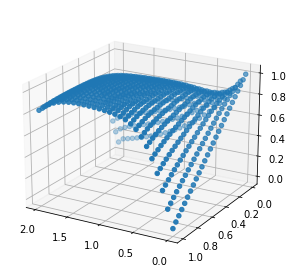

In [11]:
# Constants
epsilon = 10**-3
L2 = 1
old_L2 = 100
count = 0

# analytical functions
def x_func(x):
    return np.exp(-x)
def y_func(x):
    return 1-x

# Initialize grid size (spacing)
nx = 25
ny = 25

# Initialize solution array & boundaries
sols = np.ones((nx+2,ny+2))
x = np.linspace(0,2,num=nx+2)
y = np.linspace(0,1,num=ny+2)

x_size = sols.shape[1]
y_size = sols.shape[0]

# Direleche boundary conditions
sols[0,:] = np.exp(-x)
sols[:,0] = 1 - y 

dx = 1.0 / (nx - 1)
dy = 1.0 / (ny - 1)

new_sols = np.ones((nx+2, ny+2))
guesses = sols.copy()

# Log time
time_start = time.time()

# Start update function
# Update function continues to run until difference between L2 norms is less than epsilon
while (old_L2 - L2) >= epsilon:
        
        # Find size of matrix
        rows, cols = sols.shape
        new_sols = np.copy(sols)  
        
        # Iterate through matrix
        for i in range(1, rows-1):
            for j in range(1, cols-1):
                new_sols[i, j] = (sols[i, j-1] + sols[i, j+1] + sols[i-1, j] + sols[i+1, j]) / 4
                # Neumann boundary conditions
                new_sols[x_size-1, :] = sols[x_size-2, :] + dx *(-np.exp(-x))
                new_sols[:, y_size-1] = sols[:, y_size-2] + dy * -1
        
        # Store old L2 norm
        if count != 0:
            old_L2 = L2
        else:
            pass       
        L2 = 0
        
        # Generate new L2 norm
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                L2 += ((new_sols[i, j]-guesses[i, j])**2)
        L2 = np.sqrt(L2)    
        
        # Store solutions
        guesses = new_sols.copy()
        sols = new_sols.copy()
        count += 1      
        
# Print time
time_finish = time.time()
time_difference = time_finish - time_start
print(time_difference, 'seconds')
print(count, 'iterations')

# Begin plotting
y_range = np.linspace(0, 1, num=ny+2)
x_range = np.linspace(0, 2, num=nx+2)
new_x, new_y = np.meshgrid(x_range, y_range)

plt.figure(figsize=[10, 5])

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(new_x, new_y, new_sols)
ax.view_init(elev=20, azim=120)

plt.tight_layout()
plt.show()

In the code above, we begin by initializing 2 2D arrays, along with our convergence criteria and other counters/trackers. Once those objects are created, we can begin adding our boundary conditions. For the boundaries on the axes, we use Direleche boundary conditions, which are essentially just the analytical functions. For the outside boundaries, Neumann boundary conditions are used. This boundary condition employs use of the derivative of the function with respect to its neighboring points in the grid. 

The actual solver function is a stencil of the central finite difference method, derived by the method below, starting with an initial condition for the second derivative

$$f``(x,y) = 0$$

And our stencils for central finite difference

$$f``(x) = f(x-h) - (2*f(x)) + f(x+h)$$

$$f``(y) = f(y-h) - (2*f(y)) + f(y+h)$$

Which can be reduced to

$$f``(x,y) = (-4*f(x,y)) + f(x+h,y) + f(x-h,y) + f(x,y+h) + f(x,y-h)$$

So we can substitute

$$0 = (-4*f(x,y)) + f(x+h,y) + f(x-h,y) + f(x,y+h) + f(x,y-h)$$

$$4*f(x,y) = f(x+h,y) + f(x-h,y) + f(x,y+h) + f(x,y-h)$$

$$f(x,y) = \dfrac{(f(x+h,y) + f(x-h,y) + f(x,y+h) + f(x,y-h))}{4}$$

Regarding the L2 normalization, we simple take the sum of the magnitude of the each element and its previous iteration. Once the difference between these two sums is less than our convergence criteria (in this case 10**-3), we end the loop and plot our steady state solution.

Due to time constraints, I chose not to complete the matrix/vector solver for this portion of the assignment. With that said, I find it extremely likely a matrix/vector solver would be more time efficient than the pointwise solver. I make this assumption based on the fact the pointwise solver is iterating over each individual point, which can be computationally expensive. A matrix-vector solver works differently, using a series of linear algebra operations to converge on the solution. So while a matrix-vector solver is likely more efficient, and would probably be better for complex problems with larger data sets, pointwise solvers are still sufficient, especially when working with smaller systems.

One possible error with this method is the discretization error, meaning the larger our step sizes are, the less precise the final solution will be. One way of combating this error is to decrease the step size, but this will increase your computation time. Another error we must consider is the truncation error. Truncation error essentially occurs when an approximation is used in place of an analytical mathematic expression. In our case, our trunction error presents itself in the Taylor Series expansion used to find an expression for the second derivitive. This same expression eventually becomes our final stencil.

The second part of this assignment revolves around 1D diffusion over a length of space over time. One application of this type of solver could be the diffiusion of thermal energy in certain systems. This code utilizes the finite difference method, same as the first, but uses forward steps for the time component and central steps for the space component.

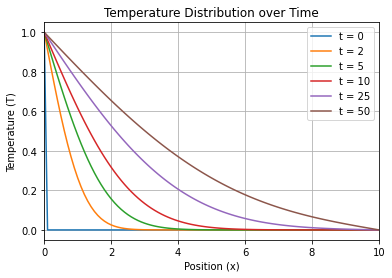

In [10]:
# Constants
length = 10.0
dx = 0.1
dt = 0.001
num_x_points = int(length / dx) + 1
num_t_points = int(length / dt) + 1

# Initialize solution array
T = np.zeros((num_t_points, num_x_points))

# Boundary condition
T[:, 0] = 1.0

# Update function
# Step forward in time
for t in range(1, num_t_points - 1):
    # Solve spacial component
    for x in range(1, num_x_points - 1):
        T[t, x] = T[t - 1, x] + dt * (T[t - 1, x - 1] - (2 * T[t - 1, x]) + T[t - 1, x + 1]) / dx**2
        #T[t,x] = T[t-1,x]+T[t,x-1]+T[t,x+1]
        
# Plotting the snapshots, extra operations were added to properly scale the time steps to the snapshot
snapshots = [0, 200*2-1, 500*2-1, 1000*2-1, 2500*2-1, 5000*2-1]
time_values = np.linspace(0, 50, num_t_points)
for snapshot in snapshots:
    plt.plot(np.arange(0, length + dx, dx), T[snapshot, :])
    
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.legend(["t = 0", "t = 2", "t = 5", "t = 10", "t = 25", "t = 50"])
plt.title('Temperature Distribution over Time')
plt.grid(True)
plt.xlim(0, 10)
plt.show()

As mentioned above, this type of algorithm can be useful when modeling the diffusion of thermal energy from a constant source through a 1D object over time, that is in fact the physical event thats happening here. If we could scale this model up to higher dimensions, its likely it could be applied in a variety of engineering fields. The update function used in this model was derived from forward and central finite difference methods, and the following initial condition.

$$ \dfrac{dT}{dt} - \dfrac{d^2T}{dx^2} = 0$$

We can then set each term to its respective forward/central stencil like so

$$ \dfrac{dT}{dt} = \dfrac{T(t+h, x) - T(t, x)}{dt}$$

$$ \dfrac{d^2T}{dx^2} = \dfrac{T(t, x-h) - (2*T(t, x)) + T(t, x+h)}{dx^2}$$

We now substitute back into our original equation and solve. Since our algorithm is solving for the next forward moment in time, we want to solve for the T(t+h, x) term.

$$\dfrac{T(t+h, x) - T(t, x)}{dt} - \dfrac{T(t, x-h) - (2*T(t, x)) + T(t, x+h)}{dx^2} = 0$$

$$\dfrac{T(t+h, x) - T(t, x)}{dt} = \dfrac{T(t, x-h) - (2*T(t, x)) + T(t, x+h)}{dx^2}$$

$$T(t+h, x) - T(t, x) = dt * (\dfrac{T(t, x-h) - (2*T(t, x)) + T(t, x+h)}{dx^2})$$

$$T(t+h, x) = T(t, x) + dt * (\dfrac{T(t, x-h) - (2*T(t, x)) + T(t, x+h)}{dx^2})$$


Briefly, an explicit solver would be a solver which analytically calculates the result of the system at each time step. This differs from an implicit solver, which uses approximations of past and future state variables within a set of bounds in order to converge on a solution. Both of the solvers implemented in this project are implicit solvers due to the fact they do not solve their systems analytically.

In conclusion, we can see the utility of pointwise solvers employing finite difference methods. Even though these methods may not be the most computationally efficient, they are still reliable implicit solvers for all kinds of mathematical systems.

References:

1. “Finite Difference Coefficient.” Wikipedia, 23 Oct. 2022, https://en.wikipedia.org/wiki/Finite_difference_coefficient

2. Neumann boundary condition. Wikipedia, 21 Mar, 2021 https://en.wikipedia.org/wiki/Neumann_boundary_condition

3. “Explicit and Implicit Methods.” Wikipedia, 14 Jan. 2021, https://en.wikipedia.org/wiki/Explicit_and_implicit_methods